## Learning objectives

load shapefiles into GeoDataFrames and plot boundaries with gpd.read_file and .boundary.plot()

subset features by attributes (e.g., exclude AK/HI/AS/GU/PR/VI and NaN state rows)

filter and visualize parks for a single state (e.g., California-only map)

merge multiple geospatial layers (states + parks) using column rename and pd.concat(ignore_index=True)

adjust map styling (e.g., linewidth=0.2) to clarify dense boundaries

compute spatial filters from geometry bounds (e.g., bounds.minx > -125 for continental selection)

create thematic overlays by assigning color columns and plotting combined layers

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Question 1

In [2]:
nps = gpd.read_file('/anvil/projects/tdm/data/nps/nps_boundary.shp')

In [50]:
#As in the name removes or excludes Alaska, Hawaii, American Samoa, Guam, Puerto Rico, U.S. Virgin Islands
excluded_states = ['AK', 'HI', 'AS', 'GU', 'PR', 'VI']
nps_clean = nps[~nps['STATE'].isin(excluded_states)]
nps_clean = nps_clean[~nps_clean['STATE'].isna()]

In [51]:
#Show proof 396
print(f"Number of parks after filtering: {len(nps_clean)}")

Number of parks after filtering: 396


Text(0.5, 1.0, 'National Parks in the 48 Continental US States + DC')

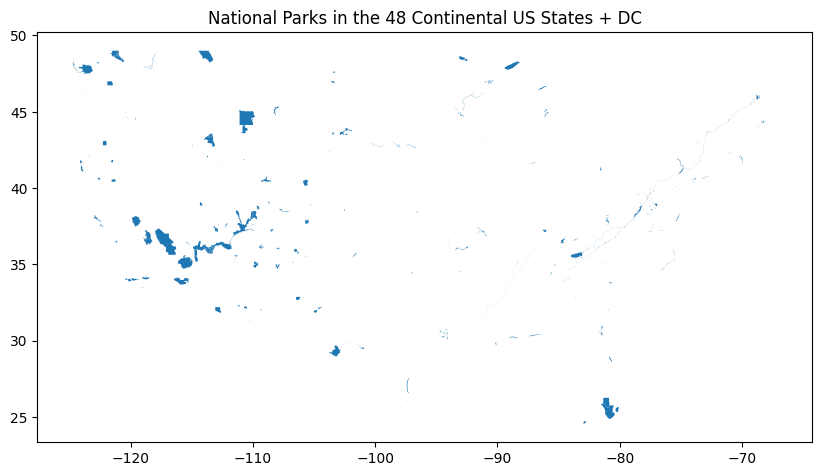

In [52]:
#just Plots
nps_clean.plot(figsize=(10, 6))
plt.title("National Parks in the 48 Continental US States + DC")

Markdown notes and sentences and analysis written here.

## Question 2

In [47]:
#This makes sure we are looking for only California State parks
ca_parks = nps_clean[nps_clean['STATE'] == 'CA']

Text(0.5, 1.0, 'National Parks in California')

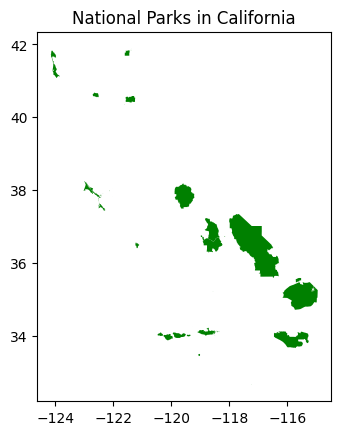

In [67]:
#plots said only California state parks
ca_parks.plot(color='green')
plt.title("National Parks in California")

Markdown notes and sentences and analysis written here.

## Question 3

In [38]:
#Load State Boundaries
states = gpd.read_file('/anvil/projects/tdm/data/boundaries/cb_2018_us_state_20m.shp')
#Excludes Alaska, Hawaii, and Purerto Rico
states_conus = states[~states['STUSPS'].isin(['AK', 'HI', 'PR'])]
#Remanes Stusps to state 
states_conus = states_conus.rename(columns={'STUSPS': 'STATE'})
# Keep only relevant columns
states_conus = states_conus[['STATE', 'geometry']]

In [39]:
# Combine state and NPS park boundaries
myresults = pd.concat([nps_clean, states_conus], ignore_index=True)

Text(0.5, 1.0, 'Boundaries of Continental US States + DC and National Parks')

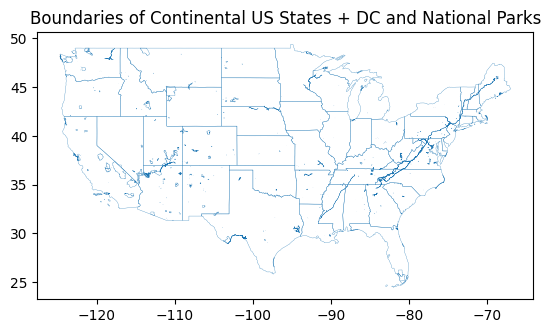

In [66]:
# Plot just the boundaries and the map
myresults.boundary.plot(linewidth=0.2)
plt.title("Boundaries of Continental US States + DC and National Parks")

Markdown notes and sentences and analysis written here.

## Question 4

In [45]:
#Gets California state boundary
ca_state = states_conus[states_conus['STATE'] == 'CA']

In [46]:
#Combines state and parks 
ca_combined = pd.concat([ca_state, ca_parks], ignore_index=True)

Text(0.5, 1.0, 'California and its National Parks')

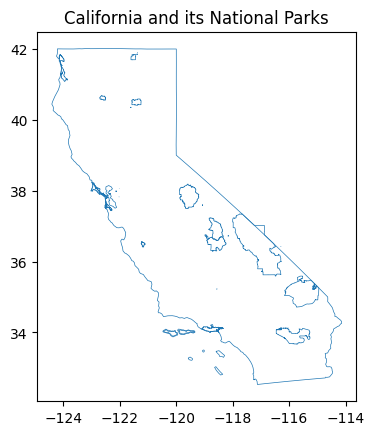

In [44]:
#plots
ca_combined.boundary.plot(linewidth=0.5)
plt.title("California and its National Parks")

Markdown notes and sentences and analysis written here.

## Question 5

In [59]:
#Data 
aiannh = gpd.read_file('/anvil/projects/tdm/data/aiannh/tl_2023_us_aiannh.shp')

In [60]:
#Get Continental US regions 
aiannh = aiannh[aiannh['geometry'].bounds.minx > -125]
aiannh = aiannh.assign(mycolors='blue')

In [61]:
#adds green color to state data
states_conus = states_conus.assign(mycolors='green')

In [63]:
# Combine both with geometry and color
final_df = pd.concat([
    states_conus[['geometry', 'mycolors']],
    aiannh[['geometry', 'mycolors']]
], ignore_index=True)

Text(0.5, 1.0, 'Continental States (Green) and AIANNH Regions (Blue)')

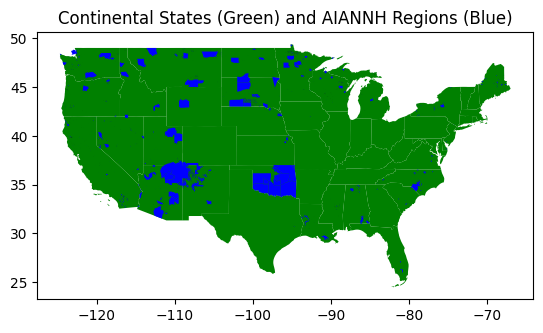

In [65]:
#Plots said map
final_df.plot(color=final_df['mycolors'])
plt.title("Continental States (Green) and AIANNH Regions (Blue)")

Markdown notes and sentences and analysis written here.